# Sketching a Phase Portrait

## CEIC3000 Process Modelling & Analysis

In this notebook, we'll explore what a phase portrait tells us about a model and how to go about making phase portraits. It is possible to make accurate phase portraits numerically using an ODE solver and also to provide a rough sketch of a phase portrait just by analysing the matrix from the linear form of the model.

Some of the code below will be really easy to follow and will help you make phase portraits in your upcoming tutorials and assignments. Some of the code is rather complicated to help make interactive demonstrations and is beyond what you need to be able to produce in this course. It's good to see some of the possibilities though!

**NB** following the big SageMathCloud upgrade last weekend, you need to click the "Classical Notebook" button on the toolbar to be able to use the interactive widgets.

In [1]:
%matplotlib inline

# standard numerical packages for process modelling
import numpy
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# because we have over-engineered code that gives interactivity too
from ipywidgets import interact, interactive, fixed
from ipykernel.pylab.backend_inline import flush_figures

# make plots look prettier (better colours and line thicknesses)
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster")
sns.set_palette(sns.color_palette("Set1", 4))

# set figure size for lecture theatre display
plt.rcParams['figure.figsize'] = (5,5)

# Model

We'll look at a simple model in zero-input form. That is, we have

$$
    \frac{\mathrm{d}x}{\mathrm{d}t} = A \vec{x}
$$

In [2]:
A = numpy.array([
        [-3, 2],
        [1, -4]
    ])

def dxdt(x, t):
    return A.dot(x)

We already know how solve a model like this using an ODE solver.

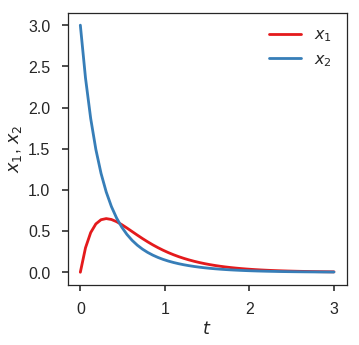

In [3]:
t = numpy.linspace(0, 3)    # times for the solution
x0 = [0, 3]                 # initial conditions
x = odeint(dxdt, x0, t)     # solve the ODE

# plot this particular solution
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('$t$')
ax.set_ylabel('$x_1$, $x_2$')
ax.plot(t, x)
ax.legend(['$x_1$', '$x_2$'], loc='upper right');

## Understanding the big picture

We want to develop a _big picture_ understanding of the system of DEs. 

 * What starting points will lead back to the steady state $(0,0)$? 
 * What initial conditions will lead to $x_1$ going through a maximum like pictured above?
 * How do the values of $x_1$ and $x_2$ compare during the solution?
 
Let's plot $x_2$ vs $x_1$ to see what the solution looks like.

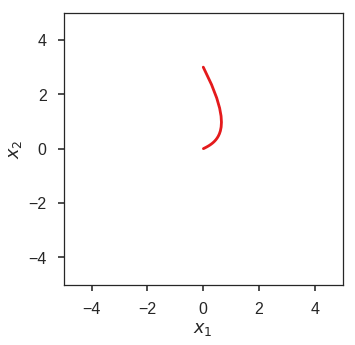

In [4]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.plot(x[:,0], x[:,1], '-');

## Adding more trajectories

We have a plot of $x_2$ vs $x_1$ with one particular solution shown on it.
We're not restricted to showing only one solution at a time though. Let's add some more
to the same set of axes.

In [6]:
def show_trajectories(num=1, eigenvectors=False):
    """ plot `num` trajectories on the same set of axes """
    
    sns.set_palette(sns.color_palette("OrRd", 9))
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # Solve the DE for a few different initial conditions
    # The initial conditions are arranged in a circle that is 
    # 7.5 units radius (i.e. just bigger than the plot)
    for theta in numpy.linspace(0, num-1, num) * 2. * numpy.pi / 36.:
        x0 = [7.5 * numpy.cos(theta), 
              7.5 * numpy.sin(theta)]
        x = odeint(dxdt, x0, t)
        ax.plot(x[:,0], x[:,1], '-')

    # Also show the directions of the eigenvectors on the plot
    if eigenvectors:
        v1 = eig(A)[1][:,0]
        v2 = eig(A)[1][:,1]

        x1 = numpy.linspace(-5, 5)
        # Use the components of the eigenvector as the slope of the line
        ax.plot(x1, x1 * v1[1] / v1[0], 'b', lw=1)
        ax.plot(x1, x1 * v2[1] / v2[0], 'b', lw=1)
    flush_figures()

In [7]:
i = interact(show_trajectories,
             num=(1, 36),
            )

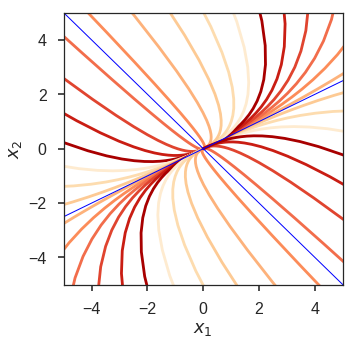

In [8]:
# Let's just show them all!
show_trajectories(num=36, eigenvectors=True)

## Procedure for sketching phase portrait

We've seen how we might go about *calculating* a phase portrait for a simple 
ODE. How do we *sketch* the phase portrait without using the ODE solver?

  1. Find equilibrium point(s): $[0, 0]$
  1. Classify: is it stable?
  1. Eigenvectors (directions)
  1. Eigenvalues (speeds)
  1. Sketch trajectories

In [9]:
plt.xkcd();

In [10]:
print("Eigenvalues are:", eig(A)[0])

Eigenvalues are: [-2. -5.]


Both are less than 0, so we know the feature is stable.

In [11]:
v1 = eig(A)[1][:, 0]
v2 = eig(A)[1][:, 1]
print("Eigenvectors:\nv1(slow) =", v1, "  v2(fast) =", v2)

Eigenvectors:
v1(slow) = [ 0.89442719  0.4472136 ]   v2(fast) = [-0.70710678  0.70710678]


For reference, these are $[2\;1]$ and $[-1\;1]$.

First, mark the steady state on the axes and plot the eigenvectors:

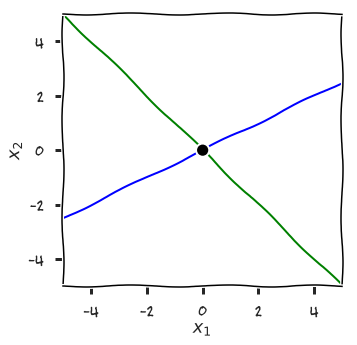

In [12]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

x1 = numpy.linspace(-5, 5)
ax.plot(x1, x1 * v1[1] / v1[0], 'b')
ax.plot(x1, x1 * v2[1] / v2[0], 'g')

ax.plot(0, 0, 'ko');

Next, we add some arrows that indicate fast _vs_ slow directions. The motion is fastest in the fast direction each time. Mark a couple of arrows in near each eigenvector, using the length of the arrow to indicate fast or slow.

In [13]:
def draw_arrows(num=0):
    """ draw parts of a phase portrait, step by step """
    # canvas for drawing
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    # Draw on eigenvectors
    x1 = numpy.linspace(-5, 5)
    ax.plot(x1, x1 * v1[1] / v1[0], 'b')
    ax.plot(x1, x1 * v2[1] / v2[0], 'g')

    # Draw on the equilibrium point
    ax.plot(0, 0, 'ko')

    # Locations of the arrows to draw on
    scaler = 0.09
    xas = [[4, 2.5], [4.2, 1.7], [-4, -2.5], [-4.2, -1.7]] + \
          [[-4, 4.5], [-4, 3.5], [4, -4.5], [4, -3.5]]

    # Draw in various bits of th phase portrait as requested
    
    # Show some arrows
    if num < 16:
        for xa in xas[0:num]:
            dx = scaler * dxdt(xa, 0)
            ax.arrow(xa[0], xa[1], dx[0], dx[1], head_width=0.3, head_length=0.3, fc='r', ec='r')

    # Show grid lines parallel to the eigenvectors
    if num > 8:
        for v1g in [-6, -4, -2, 2, 4, 6]:
            ax.plot(x1, v1g + x1 * v1[1] / v1[0], '#eeeeee', lw=1, zorder=-100)
        for v2g in [-6, -4, -2, 2, 4, 6]:
            ax.plot(x1, v2g + x1 * v2[1] / v2[0], '#eeeeee', lw=1, zorder=-100)

    # various arrows, step by step...
    if num >= 9 and num < 13:
        xaA = [2, 3]
        xa = xaA[0] * v1 + xaA[1] * v2
        ax.plot(xa[0], xa[1], 'ko', ms=4)
    if num >= 10 and num < 13:
        dx = scaler * dxdt(xa, 0)
        v1c = scaler * dxdt(xaA[0] * v1, 0)
        ax.arrow(xaA[0] * v1[0], xaA[0] * v1[1], v1c[0], v1c[1], head_width=0.2, head_length=0.1, fc='#ff33ff', ec='#ff33ff', zorder=500)
        ax.arrow(xa[0], xa[1], v1c[0], v1c[1], head_width=0.1, head_length=0.1, fc='k', ec='k', zorder=100)
    if num >= 11 and num < 13:
        v2c = scaler * dxdt(xaA[1] * v2, 0)
        ax.arrow(xaA[1] * v2[0], xaA[1] * v2[1], v2c[0], v2c[1], head_width=0.2, head_length=0.1, fc='#ff33ff', ec='#ff33ff', zorder=500)
        ax.arrow(xa[0] + v1c[0], xa[1] + v1c[1], v2c[0], v2c[1], head_width=0.1, head_length=0.1, fc='k', ec='k', zorder=100)
    if num >= 12 and num < 13:
        ax.arrow(xa[0], xa[1], dx[0], dx[1], head_width=0.3, head_length=0.3, fc='r', ec='r', zorder=500)
        
    if num >= 13 and num <= 15:
        for xaA in [[2, 3], [2, -3], [-2, 3], [-2, -3], [4, 3], [-4, -3]]:
            xa = xaA[0] * v1 + xaA[1] * v2
            dx = scaler * dxdt(xa, 0)
            ax.arrow(xa[0], xa[1], dx[0], dx[1], head_width=0.3, head_length=0.3, fc='r', ec='r', zorder=500)

    if num >= 14:
        for xaA in [[2, 3], [2, -3], [-2, 3], [-2, -3], [4, 3], [-4, -3]]:
            xa = xaA[0] * v1 + xaA[1] * v2
            t = numpy.linspace(0, 3)
            x = odeint(dxdt, xa, t)
            ax.plot(x[:,0], x[:,1], '#ff33ff', lw=2, zorder=800)
            x = odeint(dxdt, xa, -t)
            ax.plot(x[:,0], x[:,1], '#ff33ff', lw=2, zorder=800)

    # Add sone real trajectories
    if num >= 15:
        for xa in xas:
            t = numpy.linspace(0, 3)
            x = odeint(dxdt, xa, t)
            ax.plot(x[:,0], x[:,1], '#ff33ff', lw=2, zorder=800)
            x = odeint(dxdt, xa, -t)
            ax.plot(x[:,0], x[:,1], '#ff33ff', lw=2, zorder=800)
    flush_figures()

In [14]:
i = interact(draw_arrows, num=(0, 8))

Away from the eigenvectors, the trajectory is a combination of the two motions.

In [15]:
i = interact(draw_arrows, num=(8, 13))

In [16]:
i = interact(draw_arrows, num=(13, 16))

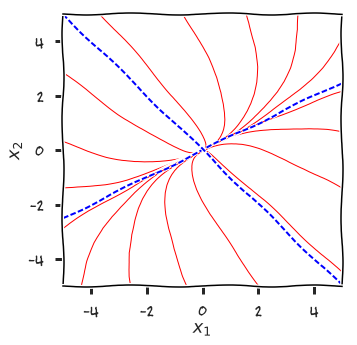

In [17]:
# Putting it all together -- a final worked example
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# plot the trajectories
num = 17
for theta in numpy.linspace(0, num-1, num) * 2. * numpy.pi / 17.:
    x0 = [7.5 * numpy.cos(theta), 
          7.5 * numpy.sin(theta)]
    x = odeint(dxdt, x0, t)
    ax.plot(x[:,0], x[:,1], 'r-', lw=1)

v1 = eig(A)[1][:,0]
v2 = eig(A)[1][:,1]

# plot the separatrices
x1 = numpy.linspace(-5, 5)
ax.plot(x1, x1 * v1[1] / v1[0], 'b--', lw=2)
ax.plot(x1, x1 * v2[1] / v2[0], 'b--', lw=2);